# Plot Training Logs : CarRace-PPO 🏎️🏁🏆

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

##### Listing the available files

**Note** : Some of them will be labeled "continuous", they use the continuous model.

In [62]:
files = glob.glob('../models/PPO_CarRacing*_log.csv')
for no, file in enumerate(files):
    fname = file.replace('_', ' ')
    print(f"{no:2d} | {fname}")

 0 | ../models\PPO Carracing 24-08-13 18-01 log.csv
 1 | ../models\PPO Carracing continuous 24-08-14 11-22 log.csv
 2 | ../models\PPO Carracing continuous 24-08-14 17-08 log.csv


In [68]:
choice = -1 # Make your choice here

##### Printing the hyperparameters

In [69]:
continuous = False
print('Hyperparameters \n' + '-'*40)
with open(files[choice].replace('log.csv','prms.json')) as jfile:
    prms = json.load(jfile)
    for key, val in prms.items():
        print(f'{key:>30s} : {val}')

if 'continuous' in files[choice].lower():
    continuous = True

print(f'{"CONTINUOUS":>30s} : {continuous}')

Hyperparameters 
----------------------------------------
                     MAX_STEPS : 2500000
                        N_IMGS : 3
                        N_IDLE : 3
                  N_START_SKIP : 30
                         GAMMA : 0.9
                     N_FILTERS : 24
                  DROPOUT_RATE : 0
                      ACTOR_LR : 0.0003
                     CRITIC_LR : 0.001
                      L2_ALPHA : 0
            SCHEDULER_PATIENCE : 100
              SCHEDULER_MIN_LR : 0.0001
              SCHEDULER_FACTOR : 0.5
                   BUFFER_SIZE : 2000
                MINIBATCH_SIZE : 64
                 UPDATE_EPOCHS : 5
                  ENTROPY_BETA : 0.0003
                  PPO_CLIP_VAL : 0.2
                    CONTINUOUS : True


##### Plotting the data

In [70]:
df = pd.read_csv(files[choice])

In [71]:
df

,episode,step,time,cum_reward,a_loss,c_loss,e_loss,action_0,action_1,action_2,a_lr,c_lr
0,0,1001,13.028291,-55.944282,0.000000,0.000000,0.000000,-0.067550,-0.063953,0.100961,0.0003,0.00100
1,1,1001,25.941887,-29.692308,0.000000,0.000000,0.000000,-0.042121,-0.001726,0.084208,0.0003,0.00100
2,2,1001,40.114130,-31.545455,0.000000,0.000000,0.000000,-0.064798,-0.106769,0.058451,0.0003,0.00100
3,3,1001,59.751809,-56.409594,0.000000,0.000000,0.000000,-0.064065,-0.051029,0.081693,0.0003,0.00100
4,4,1001,77.509496,-67.760234,0.000000,0.000000,0.000000,-0.069565,-0.073708,0.080827,0.0003,0.00100
...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2539,1001,43382.280121,278.816993,-0.027711,37.174394,-0.000265,0.036613,0.253226,-0.293346,0.0001,0.00025
2540,2540,1001,43395.565682,734.578947,-0.027711,37.174394,-0.000265,-0.011055,0.470226,-0.306565,0.0001,0.00025
2541,2541,1001,43412.188342,818.254237,-0.020890,25.244023,-0.000261,0.027489,0.505881,-0.338546,0.0001,0.00025
2542,2542,1001,43425.635472,556.594771,-0.020890,25.244023,-0.000261,0.037041,0.411255,-0.284962,0.0001,0.00025


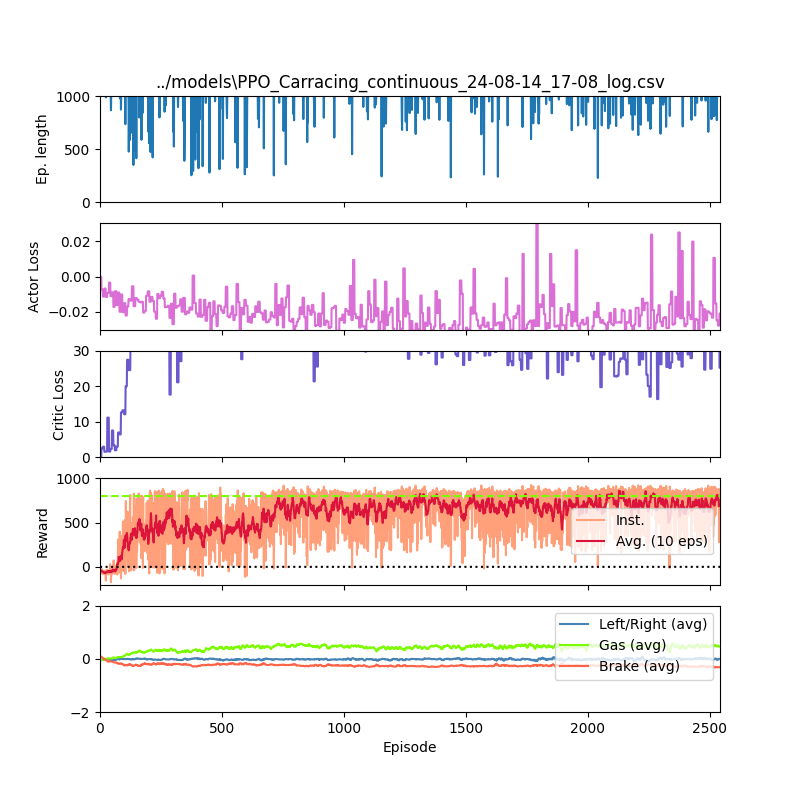

In [72]:
%matplotlib widget

fig, axes = plt.subplots(nrows=5, sharex=True, figsize=[8,8])

axes[0].plot(df['episode'], df['step'])
axes[1].plot(df['episode'], df['a_loss'], color='orchid')
axes[2].plot(df['episode'], df['c_loss'], color='slateblue')
axes[3].plot(df['episode'], df['cum_reward'], color='lightsalmon', label='Inst.')
axes[3].plot(df['episode'], df['cum_reward'].rolling(10, center=True).mean(), color='crimson', label='Avg. (10 eps)')

if continuous: 
    axes[4].plot(df['episode'], df['action_0'].rolling(10, center=True).mean(), color='steelblue', label='Left/Right (avg)')
    axes[4].plot(df['episode'], df['action_1'].rolling(10, center=True).mean(), color='lawngreen', label='Gas (avg)')
    axes[4].plot(df['episode'], df['action_2'].rolling(10, center=True).mean(), color='tomato', label='Brake (avg)')
    axes[4].set_ylim([-2,2])
else:
    axes[4].plot(df['episode'], df['action_0'].rolling(10, center=True).mean(), color='steelblue', label='Idle (prob.)')
    axes[4].plot(df['episode'], df['action_1'].rolling(10, center=True).mean(), color='olivedrab', label='Right (prob.)')
    axes[4].plot(df['episode'], df['action_2'].rolling(10, center=True).mean(), color='sandybrown', label='Left (prob.)')
    axes[4].plot(df['episode'], df['action_3'].rolling(10, center=True).mean(), color='tomato', label='Gas (prob.)')
    axes[4].plot(df['episode'], df['action_4'].rolling(10, center=True).mean(), color='mediumvioletred', label='Brake (prob.)')
    axes[4].set_ylim([0,1])

# Formatting
axes[3].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[3].plot(df['episode'], 800 * np.ones_like(df['cum_reward']), '--', color='lawngreen')
axes[0].set_ylabel('Ep. length')
axes[1].set_ylabel('Actor Loss')
axes[2].set_ylabel('Critic Loss')
axes[3].set_ylabel('Reward')
axes[3].legend()
axes[4].legend()

axes[0].set_ylim([0, 1000])
axes[1].set_ylim([-0.03,0.03])
axes[2].set_ylim([0,30])
axes[3].set_ylim([-200,1000])

axes[0].set_title(files[choice])
axes[4].set_xlim([0, df['episode'].max()])
axes[4].set_xlabel('Episode')


fig.savefig(files[choice].replace('log.csv','fig.png'))